# Chem 30324, Spring 2017, Homework 5
Due March 1, 2017

## Real-world particle-in-a-box.
### A one-dimensional particle-in-a-box is a simple but plausible model for the π electrons of a conjugated alkene, like butadiene ($C_4H_6$, shown here). Suppose all the C–C bonds in a polyene are 1.4 Å long and the polyenes are perfectly linear.

![](imgs/HW5-1.png)

### 1. Plot out the energies of the n = 1 – 6 particle-in-a-box states for ethylene (2 carbon chain), butadiene (4 carbon chain), hexatriene (6 carbon chain), octatetraene (8 carbon chain), and decapentaene (10 carbon chain). What happens to the spacing between energy levels as the molecule gets longer? As n gets larger?

The energy levels for a particle in a box are $E_n = \frac{n^2\pi^2\hbar^2}{2m_eL^2}$, n = 1, 2, ...

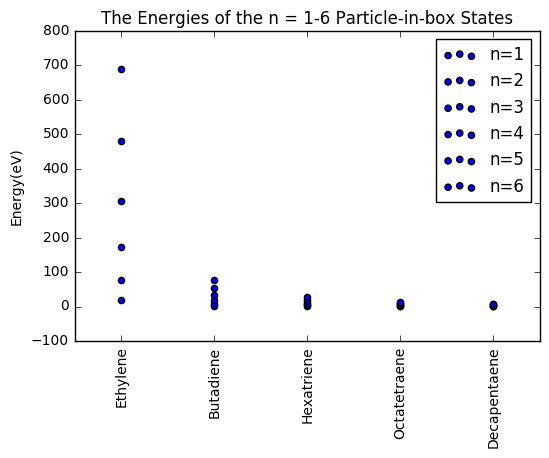

In [1]:
import numpy as np
import matplotlib.pyplot as plt

l = 1.4e-10 # m, the length of C-C bond
hbar = 1.05457e-34 # J*s
me = 9.109e-31 # kg

def E(n,N):
    return (n**2*np.pi**2*hbar**2/2/me/((N-1)*l)**2*6.2415e18) # eV, return energy of state n in molecule that contains N carbons

N = [2,4,6,8,10] # number of carbons in a molecule
n1,n2,n3,n4,n5,n6 = [],[],[],[],[],[]
for num in N:
    n1.append(E(1,num)) # put energies of n=1 state of the 5 molecules in the list
    n2.append(E(2,num)) # put energies of n=2 state of the 5 molecules in the list
    n3.append(E(3,num)) 
    n4.append(E(4,num))
    n5.append(E(5,num))
    n6.append(E(6,num))
"""create a scatter plot"""
i = 1
for n in [n1,n2,n3,n4,n5,n6]:
    plt.scatter(N,n,label='n={}'.format(i)) # x-axis is the number of carbons in a molecule, y-axis is energy
    i+=1
legend = plt.legend()   
labels = ['Ethylene', 'Butadiene', 'Hexatriene', 'Octatetraene','Decapentaene']
plt.xticks(N, labels, rotation='vertical')
plt.ylabel('Energy(eV)')
plt.title('The Energies of the n = 1-6 Particle-in-box States')
plt.show()

As the molecule gets longer, the spacing between energy levels decreases. As n gets larger, the spacing between energy levels increases.

### 2. Plot out the normalized n = 2 particle-in-a-box wavefunction for an electron in butadiene and the normalized n = 2 probability distribution. Indicate on the plots the most probable location(s) of the electron, the average location of the electron, and the positions of any nodes.

The wavefunction of particle in a box is: $$\Psi_n(x)= \sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L}), 0<x<L$$
The probability distribution of particle in a box is $\Psi_n(x)^2$:$$\Psi_n^2(x) = \frac{2}{L}sin^2(\frac{n\pi x}{L}), 0<x<L$$

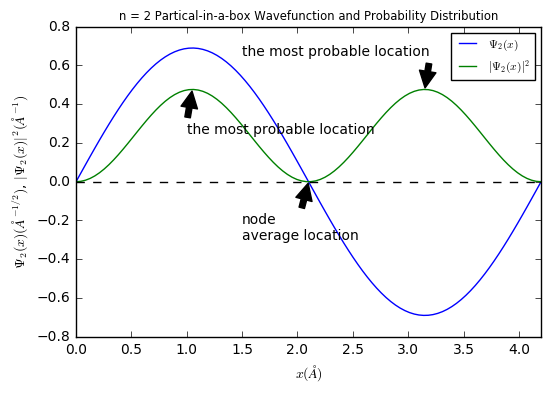

In [2]:
import numpy as np
import matplotlib.pyplot as plt

l = 1.4*3 # angstrom, the length of the molecule

def Psi_2(x):
      return (2/l)**0.5*np.sin(2*np.pi*x/l) # normalized wavefunction

x = np.linspace(0,l,100)
Psi = Psi_2(x)
p1, = plt.plot(x,Psi,label='$\Psi_2(x)$') # plot the normalized wavefunction
p2, = plt.plot(x,Psi**2,label='$|\Psi_2(x)|^2$') # plot the normalized probability distribution

plt.legend(fontsize = 'small')
plt.xlim(0,l)
plt.xlabel('$x(\AA)$')
plt.ylabel('$\Psi_2(x)(\AA^{-1/2})$, $|\Psi_2(x)|^2(\AA^{-1})$')
plt.title('n = 2 Partical-in-a-box Wavefunction and Probability Distribution',fontsize = 'small')
plt.axhline(y=0,color='k',linestyle='--') # draw a horizontal dash line

plt.annotate('the most probable location', xy=(l/4, Psi_2(l/4)**2), xytext=(1.0, 0.25), arrowprops=dict(facecolor='black', shrink=0.05)) # add annotations
plt.annotate('the most probable location', xy=(3*l/4, Psi_2(3*l/4)**2), xytext=(1.5, 0.65), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('node\naverage location', xy=(l/2, 0), xytext=(1.5, -0.3), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

### 3. Butadiene has 4 π electrons, and we will learn later that in its lowest energy state, two of these are in the n = 1 and two in the n = 2 levels. Compare the wavelength of light (in nm) necessary to excite one electron from either of these levels to the empty n = 3 level.

In [3]:
import numpy as np

l = 3*1.4e-10 # m, the length of the box
hbar = 1.05457e-34 # J*s
me = 9.109e-31 # kg
NA = 6.022e23 # /mol
hc = 1240 # ev*nm

def E(n,l):
    return (n**2*np.pi**2*hbar**2/2/me/l**2)*6.2415e18 # eV

E1_3 = E(3,l)-E(1,l) # the energy difference of n=1 and n=3 states
E2_3 = E(3,l)-E(2,l) # the energy difference of n=2 and n=3 states
lamda1_3 = hc/E1_3 # nm
lamda2_3 = hc/E2_3 # nm

print('To excite an electron from n=1 to n=3 requires light with wavelength {0:.2f}nm. \nTo excite an electron from n=2 to n=3 requires light with wavelength {1:.2f}nm.'.format(lamda1_3,lamda2_3))

To excite an electron from n=1 to n=3 requires light with wavelength 72.71nm. 
To excite an electron from n=2 to n=3 requires light with wavelength 116.34nm.


### 4. We’ll learn later that the probability of an electron jumping between two energy states by emitting or absorbing light is proportional to the square of the “transition dipole,” given by the integral $\lvert\langle\psi_{initial}\lvert e\hat{x}\rvert\psi_{final}\rangle\rvert^2$(e is the electron charge). Contrast the relative probabilities of an electron jumping from n = 1 to n = 3 and from n = 2 to n = 3 levels. Can you propose any general rules about “allowed” and forbidden jumps?

For an electron jumping from n = 1 to n = 3, $$\Psi_{initial}(x) = \sqrt{\frac{2}{L}}sin(\frac{\pi x}{L}),\quad \Psi_{final}(x) = \sqrt{\frac{2}{L}}sin(\frac{3\pi x}{L}), 0<x<L.$$ 
For an electron jumping from n = 2 to n = 3, $$\Psi_{initial}(x) = \sqrt{\frac{2}{L}}sin(\frac{2\pi x}{L}),\quad \Psi_{final}(x) = \sqrt{\frac{2}{L}}sin(\frac{3\pi x}{L}), 0<x<L.$$


In [4]:
from sympy import * # import sympy for symbolic mathematics

"""To simplify the question, we can use L = 1 m and unnormalized wavefunction to calculate the integral."""
x = symbols('x')
a = integrate((sin(pi*x)*x*sin(3*pi*x)),(x,0,1))
print(a)
b = integrate((sin(2*pi*x)*x*sin(3*pi*x)),(x,0,1))
print(b)

0
-24/(25*pi**2)


We got 0 in the first integral and a non-zero finite number in the second integral. So it's forbidden for an electron jumping from n = 1 to n = 3, it's allowed for an electron jumping from n = 2 to n = 3. We can also get more general conclusion from the symmetry of the wavefunctions that when $n_{final}-n_{initial}$ = an even number, the jump is forbidden, when $n_{final}-n_{initial}$ = an odd number, the jump is allowed.

### 5. Consider the reaction of two ethylene molecules to form butadiene:
![](imgs/HW5-2.png)
### As a very simple estimate, you could take the energy of each molecule as the sum of the energies of its π electrons, allowing only two electrons per energy level. Again taking each C—C bond as 1.4 Å long and treating the π electrons as particles in a box, calculate the total energy of an ethylene and a butadiene molecule within this model (in kJ/mol), and from these calculate the net reaction energy. Compare your results to the experimental reaction enthalpy. How well did the model do?

In [5]:
import numpy as np

l1 = 1.4e-10 # m, the length of ethylene moecule
l2 = 1.4e-10*3 # m, the length of butadiene molecule
hbar = 1.05457e-34 # J*s
me = 9.109e-31 # kg
NA = 6.022e23 # /mol

def E(n,l):
    return (n**2*np.pi**2*hbar**2/2/me/l**2) # J
E_ethylene = 2*E(1,l1)
E_butadiene = 2*E(1,l2) + 2*E(2,l2)
E_net = E_butadiene - 2*E_ethylene
print('The total energy of an ethylene molecule is {0:.2f} kJ/mol. \nThe total energy of an butadiene molecule is {1:.2f} kJ/mol.\nThe net reaction energy is {2:.2f} kJ/mol'.format(E_ethylene*NA/1000, E_butadiene*NA/1000, E_net*NA/1000))
# Experimental enthalpy of formation data from NIST
Ef_ethylene = 52.4 # kJ/mol
Ef_butadiene = 108.8 # kJ/mol
E_reaction = Ef_butadiene - 2*Ef_ethylene # kJ/mol
print('The experimental reaction enthalpy is {:.1f}kJ/mol.'.format(E_reaction))

The total energy of an ethylene molecule is 3702.24 kJ/mol. 
The total energy of an butadiene molecule is 2056.80 kJ/mol.
The net reaction energy is -5347.68 kJ/mol
The experimental reaction enthalpy is 4.0kJ/mol.


The model didn't get close prediction of the reaction energy. In the particle-in-box model, the potential in the box is 0, outside the box is infinite. It totally ignores the interaction between nucleus and electrons in the box.

### 6. This particle-in-a-box model has many flaws, not the least of which is that the ends of the polyene “box” are not infinitely high potential walls. In a somewhat better model the π electrons would travel in a finite-depth potential well. State two things that would change from the infinite depth to the finite depth model.

- Finite number of bound states. It means high enough energy levels would escape the box completely.
- Non-zero probability to "tunnel" into forbidden region.

## Really large box with a particle.
### A gas molecule rattling around in a bottle can be described as a particle in a 3-dimensional box. Consider ethylene gas in a cubic “bottle” 1 m on a side.

### 7. What is the particle-in-a-box “zero point energy” of one of these ethylene molecules, in kJ/mol? Is this energy of chemical significance?

The energy levels for a particle in a 3-D box are $E_{n_x,n_y,n_z} = \frac{(n_x^2+n_y^2+n_z^2)\pi^2\hbar^2}{2m_eL^2}$, $n_x = 1, 2, 3... \quad n_y = 1, 2, 3... \quad n_z = 1, 2, 3...$

In [6]:
import numpy as np

l = 1 # m, the length of a side of the box
hbar = 1.05457e-34 # J*s
m = 28.053*1.6605e-27 # kg, the mass of a ethylene molecule
NA = 6.022e23 # /mol

def E(n,l):
    return (n**2*np.pi**2*hbar**2/2/m/l**2) # J
E_0 = E(3**0.5,l) # nx = ny = nz = 1
print('The zero point energy is {:.3E} kJ/mol.'.format(E_0*NA/1000))

The zero point energy is 2.128E-21 kJ/mol.


The energy has no chemical significance.

### 8. According to the kinetic theory of gases, what is the average kinetic energy of an ethylene molecule at 298 K? What is the approximate value of $n = \sqrt{n_x^2 + n_y^2 + n_z^2}$ of a gas molecule molecule with this energy at 298 K?

According to the kinetic theory of gases, the average kinetic energy of an ethylene molecule is $E = \frac{3}{2}k_BT$.

In [7]:
k = 1.38065e-23 # J/K
T = 298 # K
KE = 3/2*k*T
n = np.sqrt(KE*2*m*l**2/np.pi**2/hbar**2)
print('The average kinetic energy of an ethylene molecule at 298 K is {0:.3E} J. The approximate value of n is {1:.3E}.'.format(KE,n))

The average kinetic energy of an ethylene molecule at 298 K is 6.172E-21 J. The approximate value of n is 7.238E+10.


### 9. What is the energy difference between the *n* and *n + 1* levels (in kJ/mol)? Is it possible to determine the exact value of *n* for a particular molecule?

In [8]:
deltaE = E(n+1,l) - E(n,l)
print('The energy difference between the n and n+1 levels is {:.3E} kJ/mol'.format(deltaE*NA/1000))

The energy difference between the n and n+1 levels is 1.027E-10 kJ/mol


The difference in energy is very small, the energy levels can be regarded as continuous energy. So it it not possible to determine the exact value of n for a particular molecule.